# Step 2: Non-linear Convection

I began this trek along the 12 steps of Navier stokes with the extremely simple 1-D linear convection equation shown below:

$$ \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0 $$

Next, we up the ante and present a new more complex model known as the 1D convection equation (notice the lack of the word linear) :

$$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 $$

Now, instead of a constant factor `c` multiplying we have the solution `u` doing that instead. Thus this makes our convection equation behave nonlinearly. We shall follow the exact discretization steps outline in **Step 1** with the following result:

$$\frac{u_i^{n+1} - u^n_i}{\Delta t} + u^n_i \frac{u_{i}^{n} - u^n_{i-1}}{\Delta t} = 0$$

Solving for the same unknown value $u_i^{n+1}$:

$$ u_i^{n+1} = u^n_i - u^n_i \frac{\Delta t}{\Delta x}(u_i^n - u^n_{i-1}) $$

The following step is a condensed version of what we did to set up initial conditions, variables and libraries and is   taken directly from the previous notebook.

## Libraries & Initial Conditions

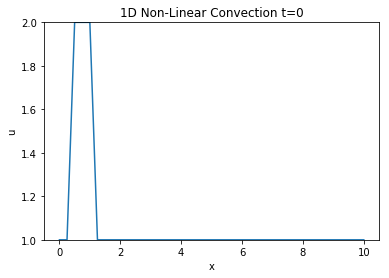

In [1]:
# Adding inline command to make plots appear under comments
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline   

#Same initial conditions as in step 1
grid_length = 10
grid_points = 41
dx = grid_length / (grid_points - 1) 
nt = 400
dt = 0.025

#Initiallizing the shape of the wave to the same one from step 1 and displaying it
u = np.ones(grid_points)
u[int(.5/ dx):int(1 / dx + 1)] = 2
plt.plot(np.linspace(0,grid_length,grid_points), u);
plt.ylim(1,2);
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Non-Linear Convection t=0');

## Applying the discretization

Now we apply the discretization as outlined above and check out the final results.

In [2]:
un = np.ones(grid_points)

for n in range(nt): #Runs however many timesteps you set earlier
    un = u.copy()   #copy the u array to not overwrite values
    for i in range(1,grid_points):
        u[i] = un[i] - un[i] * dt/dx * (un[i]-un[i-1]) 

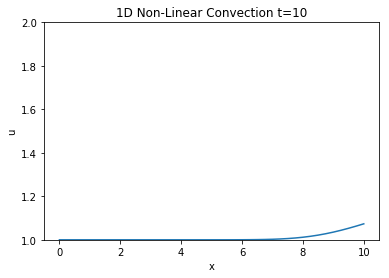

In [3]:
plt.plot(np.linspace(0,grid_length,grid_points), u);
plt.ylim(1,2);
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Non-Linear Convection t=10');

### Results

Looks pretty unchanged, to have a better idea if it behaved the same way we will take a look at the animation.

## Animating the wave moving

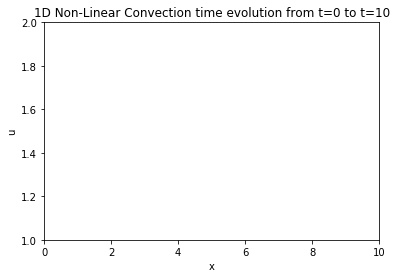

In [4]:
#Imports for animation and display within a jupyter notebook
from matplotlib import animation, rc 
from IPython.display import HTML

#Generating the figure that will contain the animation
fig, ax = plt.subplots()
ax.set_xlim(( 0, grid_length))
ax.set_ylim((1, 2))
line, = ax.plot([], [], lw=2)
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Non-Linear Convection time evolution from t=0 to t=10');
#Resetting the U wave back to initial conditions
u = np.ones(grid_points)
u[int(.5/ dx):int(1 / dx + 1)] = 2

In [5]:
#Initialization function for funcanimation
def init():
    line.set_data([], [])
    return (line,)

In [6]:
#Main animation function, each frame represents a time step in our calculation
def animate(j):
    x = np.linspace(0, grid_length, grid_points)
    un = u.copy()   #copy the u array to not overwrite values
    for i in range(1,grid_points):
        u[i] = un[i] - un[i] * dt/dx * (un[i]-un[i-1]) 
    line.set_data(x, u)
    return (line,)

In [7]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=20)
HTML(anim.to_jshtml())

## Conclusion

Yep, pretty similar behaviour. Only difference would be in the speed in which it changes shape in the beginning steps, but not much else is of notice.

 Next we will take a quick detour to talk about the CFL condition.